# Simple autoencoder

In [1]:
%matplotlib inline

from keras.layers import Input, Dense
from keras.models import Model

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data_loc = "/media/sergiun/workpc/tmp/iomics/cll_data/"
import pandas as pd
df_meth = pd.read_csv(data_loc + "CLL_data_Methylation.csv", index_col=0)
df_mrna = pd.read_csv(data_loc + "CLL_data_mRNA.csv", index_col=0)

# drop nans by column
df_mrna = df_mrna.dropna(axis='columns')
df_meth = df_meth.dropna(axis='columns')

X = pd.concat([df_mrna, df_meth])
X = X.dropna(axis='columns')
print(X.shape)

#cols = ["Methylation." + column[5:] for column in df_mrna.columns.values]
#df_meth = df_meth.filter(cols)
#cols = ["mRNA." + column[12:] for column in df_meth.columns.values]
#df_mrna = df_mrna.filter(cols)
#print(df_meth.shape, df_mrna.shape)

#s1_train = df_mrna.transpose()
#s2_train = df_meth.transpose()

#print(pd.isnull(s1_train).sum().sum(),pd.isnull(s2_train).sum().sum())
#X = np.concatenate((s1_train,s2_train), axis=-1)

X_train, X_test = train_test_split(X)

(9248, 135)


In [3]:
print(X_train.shape, X_test.shape)

(6936, 135) (2312, 135)


In [12]:
data_loc = "/media/sergiun/workpc/tmp/iomics/cll_data/"
import pandas as pd
df_meth = pd.read_csv(data_loc + "CLL_data_Methylation.csv")
df_meth.head()

,Unnamed: 0,H045,H109,H024,H056,H079,H164,H059,H167,H113,...,H178,H166,H174,H177,H259,H175,H179,H050,H180,H229
0,cg10146935,1.811086,-3.997508,-2.844313,-3.338656,-0.019362,-2.485997,-1.460211,-4.952291,-2.980209,...,-5.077259,-0.625954,-4.918812,-4.727493,-5.193812,-4.437189,-5.060459,NaN,NaN,NaN
1,cg26837773,-5.172572,1.594870,0.161170,-2.093433,3.748980,0.060530,-3.472232,0.547577,2.440098,...,-4.821910,-0.858200,3.214163,2.036858,-0.816088,4.043775,-2.345652,NaN,NaN,NaN
2,cg17801765,5.411526,5.412693,0.365706,0.373634,5.412010,5.268908,-4.989999,5.337081,0.749546,...,4.873615,0.753594,-0.628446,-4.584779,0.547390,4.086683,0.135581,NaN,NaN,NaN
3,cg13244315,-0.118825,1.043871,-4.219236,-1.592196,1.416418,4.659831,-0.461120,-1.918861,-1.237015,...,4.069311,3.287555,2.059305,2.244938,-0.210781,1.388141,-3.354897,NaN,NaN,NaN
4,cg06181703,5.120384,1.279480,0.721100,4.047059,5.237422,1.761247,4.543997,4.939463,4.781683,...,4.123456,2.817449,2.874335,-3.451370,-0.025308,4.143205,-3.581970,NaN,NaN,NaN


In [6]:
# reduce to 40 features
encoding_dim = 20

input_df = Input(shape=(135,))
encoded = Dense(encoding_dim, activation='relu')(input_df)
decoded = Dense(135, activation='sigmoid')(encoded)

# encoder
autoencoder = Model(input_df, decoded)

# intermediate result
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [ ]:
history = autoencoder.fit(X_train, X_train,
                epochs=450,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

In [8]:
encoded

<tf.Tensor 'dense_4/Relu:0' shape=(None, 20) dtype=float32>

In [9]:
encoded.get_weights()

AttributeError: 'Tensor' object has no attribute 'get_weights'

In [12]:
encoder

In [13]:
autoencoder

In [16]:
autoencoder.layers

In [14]:
weights = [layer.get_weights() for layer in autoencoder.layers]

In [27]:
for w in weights:
    if len(w)>1:
        print("weights")
        print(len(w))
        print(len(w[0]), w[0].shape, w[0])
        print(len(w[1]), w[1].shape, w[1])
    

weights
2
135 (135, 20) [[ 0.10079226  0.1901159   0.10887439 ...  0.0257957  -0.0048612
  -0.03749699]
 [-0.07228259 -0.15518847  0.16159578 ...  0.05914636  0.05390287
  -0.06334154]
 [-0.13028744  0.14800234 -0.04570466 ... -0.03677541  0.18893497
   0.00967223]
 ...
 [ 0.04784469 -0.03089605  0.12845954 ...  0.10411295  0.1297238
  -0.03053636]
 [ 0.01112589  0.01996259  0.19052981 ... -0.07620179  0.16358472
  -0.09604552]
 [ 0.125139    0.08153974  0.05731371 ... -0.11809239 -0.11167922
  -0.07032198]]
20 (20,) [ 2.26381253e-02 -2.83680880e-03  1.49067258e-02  9.63987876e-03
 -6.62457955e-04  1.11966282e-02 -1.51424843e-03  4.75568260e-04
 -1.44357206e-02  1.68226510e-02  8.67040799e-05  4.66341339e-03
  1.24121234e-02  7.66261423e-04 -1.24689145e-02 -1.00893471e-02
  7.33122043e-03  1.99186634e-02  2.97983028e-02  1.35804024e-02]
weights
2
20 (20, 135) [[ 0.14339943 -0.01015244  0.12258269 ...  0.02744631  0.18035385
   0.18661772]
 [ 0.04609731  0.07309844 -0.04638461 ...  0.01

In [30]:
model = autoencoder
names = [weight.name for layer in model.layers for weight in layer.weights]
weights = model.get_weights()

for name, weight in zip(names, weights):
    print(name, weight.shape)
    print(name, weight)

dense_4/kernel:0 (135, 20)
dense_4/kernel:0 [[ 0.10079226  0.1901159   0.10887439 ...  0.0257957  -0.0048612
  -0.03749699]
 [-0.07228259 -0.15518847  0.16159578 ...  0.05914636  0.05390287
  -0.06334154]
 [-0.13028744  0.14800234 -0.04570466 ... -0.03677541  0.18893497
   0.00967223]
 ...
 [ 0.04784469 -0.03089605  0.12845954 ...  0.10411295  0.1297238
  -0.03053636]
 [ 0.01112589  0.01996259  0.19052981 ... -0.07620179  0.16358472
  -0.09604552]
 [ 0.125139    0.08153974  0.05731371 ... -0.11809239 -0.11167922
  -0.07032198]]
dense_4/bias:0 (20,)
dense_4/bias:0 [ 2.26381253e-02 -2.83680880e-03  1.49067258e-02  9.63987876e-03
 -6.62457955e-04  1.11966282e-02 -1.51424843e-03  4.75568260e-04
 -1.44357206e-02  1.68226510e-02  8.67040799e-05  4.66341339e-03
  1.24121234e-02  7.66261423e-04 -1.24689145e-02 -1.00893471e-02
  7.33122043e-03  1.99186634e-02  2.97983028e-02  1.35804024e-02]
dense_5/kernel:0 (20, 135)
dense_5/kernel:0 [[ 0.14339943 -0.01015244  0.12258269 ...  0.02744631  0.180

In [32]:
import matplotlib.pyplot as plt
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

dict_keys(['loss', 'val_loss'])


KeyError: 'accuracy'

dict_keys(['loss', 'val_loss'])


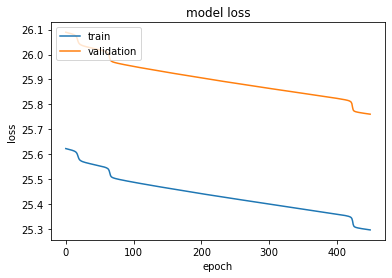

In [35]:
import matplotlib.pyplot as plt
print(history.history.keys())

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
history.history